# Example Time Series Classsification Workflow
- source: "Practical Time Series Analysis"
- package: sesium

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cesium import datasets
from cesium.featurize import featurize_time_series as ft

%pdb

Automatic pdb calling has been turned ON


In [2]:
eeg = datasets.fetch_andrzejak()

Loaded data from cached archive.


In [7]:
pd.DataFrame(eeg)

,times,measurements,classes,archive,header
0,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[40.0, 48.0, 35.0, 5.0, -40.0, -54.0, -32.0, 6...",Z,C:\Users\25077/.local/datasets/andrzejak\andrz...,C:\Users\25077/.local/datasets/andrzejak\andrz...
1,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-56.0, -50.0, -64.0, -91.0, -135.0, -140.0, -...",Z,C:\Users\25077/.local/datasets/andrzejak\andrz...,C:\Users\25077/.local/datasets/andrzejak\andrz...
2,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-37.0, -22.0, -17.0, -24.0, -31.0, -20.0, -5....",Z,C:\Users\25077/.local/datasets/andrzejak\andrz...,C:\Users\25077/.local/datasets/andrzejak\andrz...
3,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-31.0, -43.0, -39.0, -39.0, -9.0, -5.0, 18.0,...",Z,C:\Users\25077/.local/datasets/andrzejak\andrz...,C:\Users\25077/.local/datasets/andrzejak\andrz...
4,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[14.0, 26.0, 32.0, 25.0, 16.0, 8.0, 8.0, 12.0,...",Z,C:\Users\25077/.local/datasets/andrzejak\andrz...,C:\Users\25077/.local/datasets/andrzejak\andrz...
...,...,...,...,...,...
495,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[343.0, 311.0, 284.0, 274.0, 260.0, 237.0, 165...",S,C:\Users\25077/.local/datasets/andrzejak\andrz...,C:\Users\25077/.local/datasets/andrzejak\andrz...
496,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[84.0, 75.0, 21.0, -68.0, -138.0, -184.0, -197...",S,C:\Users\25077/.local/datasets/andrzejak\andrz...,C:\Users\25077/.local/datasets/andrzejak\andrz...
497,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[-310.0, 93.0, 494.0, 789.0, 798.0, 552.0, 202...",S,C:\Users\25077/.local/datasets/andrzejak\andrz...,C:\Users\25077/.local/datasets/andrzejak\andrz...
498,"[0.0, 0.00576171875, 0.0115234375, 0.017285156...","[340.0, 353.0, 400.0, 470.0, 538.0, 590.0, 611...",S,C:\Users\25077/.local/datasets/andrzejak\andrz...,C:\Users\25077/.local/datasets/andrzejak\andrz...


## Visualization

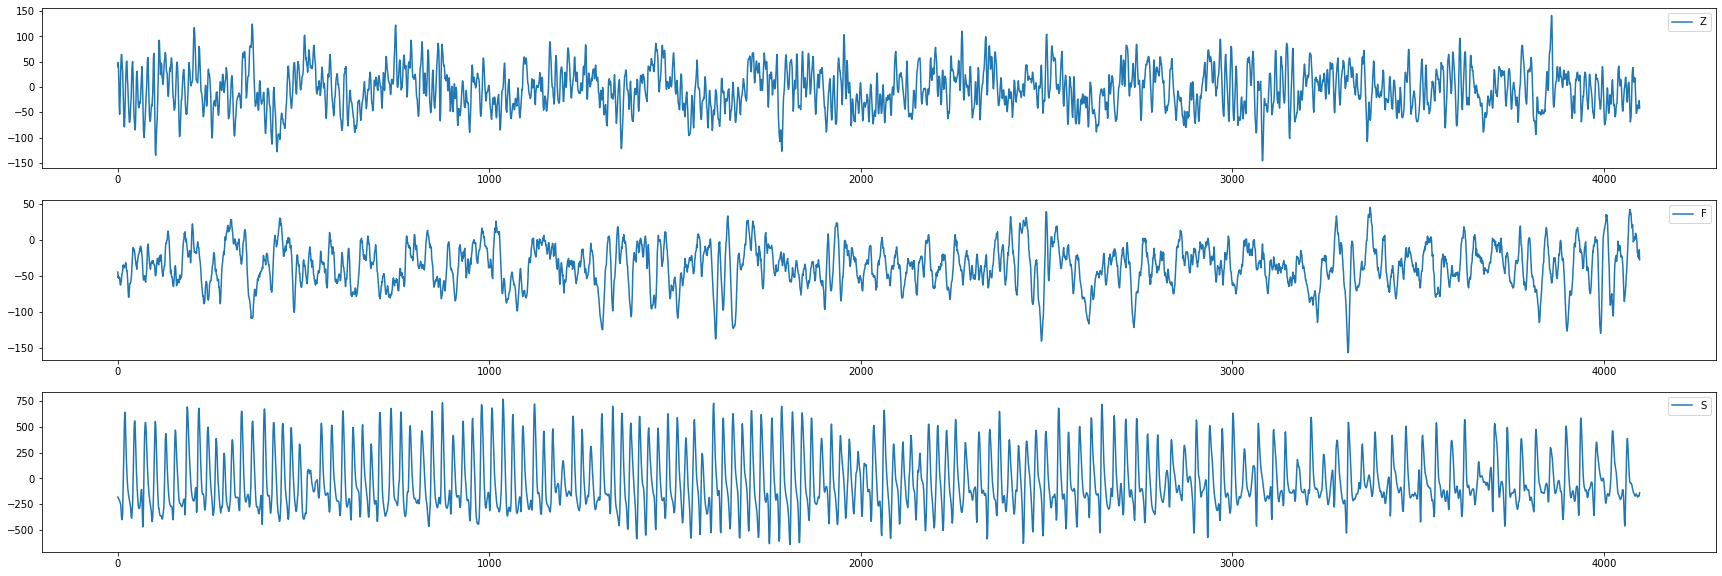

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(30,10))

axs[0].plot(eeg['measurements'][0]); axs[0].legend(eeg['classes'][0])
axs[1].plot(eeg['measurements'][300]); axs[1].legend(eeg['classes'][300])
axs[2].plot(eeg['measurements'][450]); axs[2].legend(eeg['classes'][450])


Observations:
- different amplitude
- different skewness

## Feature generation

In [34]:
features_to_use = ['amplitude', 'percent_beyond_1_std', 'percent_close_to_median', 'skew', 'max_slope']
fset_cesium = ft(
    times=eeg['times'],
    values=eeg['measurements'],
    errors=None,
    features_to_use=features_to_use,
    scheduler=None
)

In [35]:
fset_cesium.head()

feature,amplitude,percent_beyond_1_std,percent_close_to_median,skew,max_slope
channel,0,0,0,0,0
0,143.5,0.327313,0.505004,0.032805,11107.796610
1,211.5,0.290212,0.640469,-0.092715,20653.559322
2,165.0,0.302660,0.515987,-0.004100,13537.627119
3,171.5,0.300952,0.541128,0.063678,17008.813559
4,170.0,0.305101,0.566268,0.142753,13016.949153
